In [1]:
import numpy as np
import tensorflow as tf

from env import *
from DataLoader import DataLoader
from AttGan import AttGan

In [2]:
dloader = DataLoader(BATCH_SIZE)
dloader.build()

model = AttGan(eta=ETA, num_att=dloader.num_att)
model.build()

# tf.summary.FileWriter("./logdir/", graph=model.graph)

for e in range(EPOCHS):
    train_loss_g = 0.0
    train_loss_d = 0.0
    
    for X_src, X_att_a, X_att_b in dloader.next_batch():
        loss_g, loss_d = model.step(X_src, X_att_a, X_att_b)
        train_loss_g += loss_g
        train_loss_d += loss_d
        
    train_loss_g /= len(dloader)
    train_loss_d /= len(dloader)
    
    print(f"Epochs {e+1}/{EPOCHS}")
    print(f"Train generator loss: {train_loss_g:.8f}")
    print(f"Train discriminator loss: {train_loss_d:.8f}")
    
model.save("./ckpts/attgan2")

W0802 16:07:43.243619 140286954657152 deprecation_wrapper.py:119] From /home/jylee/projects/attgan/AttGan.py:238: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



Number of invalid file: 0
Number of images: 16
Number of attributes: 1
Number of batches: 1
Building Attgan...


W0802 16:07:43.442288 140286954657152 deprecation_wrapper.py:119] From /home/jylee/projects/attgan/AttGan.py:50: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W0802 16:07:43.443129 140286954657152 deprecation_wrapper.py:119] From /home/jylee/projects/attgan/AttGan.py:296: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



Building generator 0...
Generator 0 was built.
Building discriminator 0...


W0802 16:07:43.970582 140286954657152 deprecation.py:323] From /home/jylee/.conda/envs/tf1env/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Discriminator 0 was built.


W0802 16:07:48.620682 140286954657152 deprecation_wrapper.py:119] From /home/jylee/projects/attgan/AttGan.py:125: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0802 16:07:50.648901 140286954657152 deprecation_wrapper.py:119] From /home/jylee/projects/attgan/AttGan.py:126: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.

W0802 16:07:51.758542 140286954657152 deprecation_wrapper.py:119] From /home/jylee/projects/attgan/AttGan.py:128: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.



Attgan was built.
Epochs 1/500
Train generator loss: 60.13133240
Train discriminator loss: 5.09693146
Epochs 2/500
Train generator loss: 45.48674011
Train discriminator loss: 6.14688396
Epochs 3/500
Train generator loss: 36.48310089
Train discriminator loss: 6.00903559
Epochs 4/500
Train generator loss: 31.08861351
Train discriminator loss: 6.03267097
Epochs 5/500
Train generator loss: 25.81472588
Train discriminator loss: 6.08549166
Epochs 6/500
Train generator loss: 22.40850830
Train discriminator loss: 6.06377220
Epochs 7/500
Train generator loss: 20.70772362
Train discriminator loss: 6.01786089
Epochs 8/500
Train generator loss: 19.80962181
Train discriminator loss: 6.00013351
Epochs 9/500
Train generator loss: 19.23666382
Train discriminator loss: 6.01843929
Epochs 10/500
Train generator loss: 18.80401611
Train discriminator loss: 6.04046631
Epochs 11/500
Train generator loss: 12.44212151
Train discriminator loss: 6.03915691
Epochs 12/500
Train generator loss: 12.12835121
Train di

In [3]:
import cv2
import matplotlib.pyplot as plt

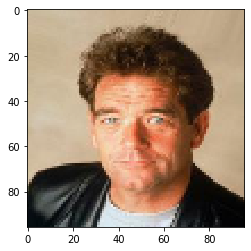

In [4]:
img = cv2.imread("data_sample_/img_align_celeba/000052.jpg")
img = cv2.resize(img, dsize=(96, 96)).astype(np.float32)

img = (img - 128) / 128

img_src = cv2.cvtColor((img + 1)/2, cv2.COLOR_BGR2RGB)
plt.imshow(img_src)

In [5]:
img_converted = model.convert(img.reshape(1, *img.shape), np.ones((1, 1)))

In [6]:
img_converted.shape

(1, 96, 96, 3)

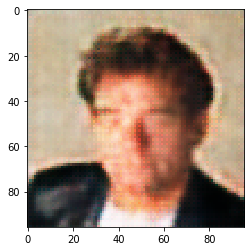

In [7]:
img_converted = cv2.cvtColor(img_converted.squeeze(), cv2.COLOR_BGR2RGB)
plt.imshow((img_converted*127 + 128)/255)